In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test = pd.read_csv("test.csv")

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
train.drop(columns=['Fare', 'Embarked', 'Name', 'Ticket', 'PassengerId'], inplace=True)
test.drop(columns=['Fare', 'Embarked', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [25]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [26]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin'], dtype='object')

# Univariate exploration

## Survived

In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Pclass

In [5]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Sex

In [9]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [10]:
train['Sex'].replace('male', 1, inplace=True)
train['Sex'].value_counts()

1         577
female    314
Name: Sex, dtype: int64

In [11]:
train['Sex'].replace('female', 0, inplace=True)
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

## Age

In [12]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
age_mask = train['Age'].isnull()

In [14]:
train.loc[age_mask, 'Age'] = train['Age'].median()

## Cabin

In [15]:
train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F33            3
D              3
E101           3
F2             3
D26            2
B58 B60        2
E67            2
C65            2
C126           2
C123           2
E121           2
D33            2
C68            2
E8             2
E44            2
B35            2
D20            2
B28            2
C83            2
B22            2
D36            2
D17            2
E24            2
C52            2
E33            2
B5             2
              ..
D47            1
E63            1
E46            1
A5             1
D28            1
C82            1
C30            1
C86            1
F G63          1
C101           1
D6             1
A20            1
B50            1
D19            1
A32            1
E49            1
D48            1
D10 D12        1
T              1
B69            1
B82 B84        1
B41            1
D21            1
C49            1
B39            1
D45            1
E10            1
A6            

In [16]:
train['Cabin'] = train['Cabin'].apply(lambda x: str(x).lower()[0])

## Fare

In [37]:
fare_mask = test['Fare'].isnull()

In [38]:
test.loc[fare_mask, 'Fare']

152   NaN
Name: Fare, dtype: float64

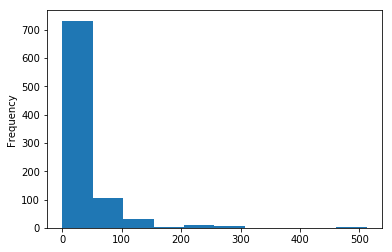

In [26]:
train['Fare'].plot(kind='hist')

In [61]:
train.drop('Survived', axis=1)

,Pclass,Sex,Age,SibSp,Parch,Cabin
0,3,1,22.0,1,0,n
1,1,0,38.0,1,0,c
2,3,0,26.0,0,0,n
3,1,0,35.0,1,0,c
4,3,1,35.0,0,0,n
5,3,1,NaN,0,0,n
6,1,1,54.0,0,0,e
7,3,1,2.0,3,1,n
8,3,0,27.0,0,2,n
9,2,0,14.0,1,0,n


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Survived', 'Cabin']), train['Survived'], test_size=0.2, random_state=4)

In [97]:
X_train

,Pclass,Sex,Age,SibSp,Parch
42,3,1,28.00,0,0
684,2,1,60.00,1,1
605,3,1,36.00,1,0
409,3,0,28.00,3,1
740,1,1,28.00,0,0
763,1,0,36.00,1,2
374,3,0,3.00,3,1
745,1,1,70.00,1,1
452,1,1,30.00,0,0
120,2,1,21.00,2,0


In [99]:
k_val, score = [], []
for k in range(50):
    clf = KNeighborsClassifier(k+1)
    clf.fit(X_train, y_train)
    k_val.append(k+1)
    score.append(accuracy_score(y_test, clf.predict(X_test)))

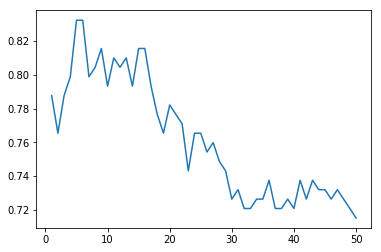

In [102]:
plt.plot(k_val, score)

# Temp

In [107]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [108]:
train = pd.read_csv("train.csv")

In [109]:
drop_columns = ['Fare', 'Embarked', 'Name', 'Ticket', 'PassengerId', 'Cabin']
train.drop(columns=drop_columns, inplace=True)

In [110]:
age_mask = train['Age'].isnull()
train.loc[age_mask, 'Age'] = train['Age'].median()

In [111]:
train['Sex'].replace('male', 1, inplace=True)
train['Sex'].replace('female', 0, inplace=True)

In [112]:
target = 'Survived'

In [113]:
kf = KFold(n_splits=train.shape[0], random_state=4)

In [114]:
clf = KNeighborsClassifier(5)

In [121]:
for k, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test = train.drop(target, axis=1).loc[train_index], train.drop(target, axis=1).loc[test_index]
    y_train, y_test = train.loc[train_index, target], train.loc[test_index, target]

    clf.fit(X_train, y_train)

    print("fold", k, "score", clf.score(X_test, y_test))

fold 0 score 1.0
fold 1 score 1.0
fold 2 score 0.0
fold 3 score 1.0
fold 4 score 1.0
fold 5 score 1.0
fold 6 score 1.0
fold 7 score 1.0
fold 8 score 0.0
fold 9 score 1.0
fold 10 score 1.0
fold 11 score 0.0
fold 12 score 1.0
fold 13 score 1.0
fold 14 score 0.0
fold 15 score 0.0
fold 16 score 1.0
fold 17 score 0.0
fold 18 score 1.0
fold 19 score 0.0
fold 20 score 1.0
fold 21 score 0.0
fold 22 score 1.0
fold 23 score 0.0
fold 24 score 1.0
fold 25 score 0.0
fold 26 score 1.0
fold 27 score 1.0
fold 28 score 0.0
fold 29 score 1.0
fold 30 score 1.0
fold 31 score 1.0
fold 32 score 0.0
fold 33 score 1.0
fold 34 score 1.0
fold 35 score 0.0
fold 36 score 0.0
fold 37 score 1.0
fold 38 score 1.0
fold 39 score 1.0
fold 40 score 1.0
fold 41 score 0.0
fold 42 score 1.0
fold 43 score 1.0
fold 44 score 0.0
fold 45 score 1.0
fold 46 score 1.0
fold 47 score 0.0
fold 48 score 1.0
fold 49 score 1.0
fold 50 score 1.0
fold 51 score 1.0
fold 52 score 1.0
fold 53 score 1.0
fold 54 score 1.0
fold 55 score 0.0
fo

fold 458 score 1.0
fold 459 score 1.0
fold 460 score 0.0
fold 461 score 1.0
fold 462 score 1.0
fold 463 score 1.0
fold 464 score 1.0
fold 465 score 1.0
fold 466 score 1.0
fold 467 score 1.0
fold 468 score 1.0
fold 469 score 1.0
fold 470 score 1.0
fold 471 score 1.0
fold 472 score 1.0
fold 473 score 0.0
fold 474 score 0.0
fold 475 score 1.0
fold 476 score 1.0
fold 477 score 1.0
fold 478 score 1.0
fold 479 score 1.0
fold 480 score 1.0
fold 481 score 1.0
fold 482 score 1.0
fold 483 score 1.0
fold 484 score 0.0
fold 485 score 1.0
fold 486 score 1.0
fold 487 score 0.0
fold 488 score 1.0
fold 489 score 0.0
fold 490 score 1.0
fold 491 score 1.0
fold 492 score 1.0
fold 493 score 1.0
fold 494 score 1.0
fold 495 score 1.0
fold 496 score 0.0
fold 497 score 1.0
fold 498 score 0.0
fold 499 score 1.0
fold 500 score 1.0
fold 501 score 1.0
fold 502 score 0.0
fold 503 score 0.0
fold 504 score 1.0
fold 505 score 1.0
fold 506 score 1.0
fold 507 score 0.0
fold 508 score 1.0
fold 509 score 0.0
fold 510 sco